# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [1]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [3]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.


In [24]:

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None):  # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child):  # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self

    def equal(self, node):  # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list):  # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self):  # Igual al toString Java
        return str(self.data)


connections = {
    'Casa': {'Unidad Educativa UNE': 0.35, 'Escuela de Edu.Basi Dolores Sucre': 2.1},
    'Unidad Educativa UNE': {'Unidad Edu. Particular': 1.4, 'Universidad Catolica de CUENCA': 0.75, 'Casa': 1},
    'Unidad Edu. Particular': {'Unidad Educativa UNE': 1.4},
    'Universidad Catolica de CUENCA': {'Unidad Educativa UNE': 0.75},
    'Escuela de Edu.Basi Dolores Sucre': {'Escuela de Edu.Basi Emilio Abad': 0.45, 'Unidad Edu.Roberto Rodas': 1,
                                          'Casa': 2.1},
    'Unidad Edu.Roberto Rodas': {'Escuela de Edu.Basi Dolores Sucre': 1},
    'Escuela de Edu.Basi Emilio Abad': {'Unidad Edu. Luis Rogelio Gonzales': 0.19, 'Unidad Edu.La Salle': 0.23,
                                        'Escuela de Edu.Basi Dolores Sucre': 0.45},
    'Unidad Edu. Luis Rogelio Gonzales': {'San Francisco de Peleusi De Azogues': 0.35, 'Centro Educativo Colibri': 0.12,
                                          'Escuela de Edu.Basi Emilio Abad': 0.19},

    'San Francisco de Peleusi De Azogues': {'Unidad Edu. Luis Rogelio Gonzales': 0.35},
    'Centro Educativo Colibri': {'Unidad Edu. Luis Rogelio Gonzales': 12},
    'Unidad Edu.La Salle': {'Unidad Edu. 16 de abril': 0.5, 'Unidad Edu.Providencia': 0.45,
                            'Escuela de Edu.Basi Emilio Abad': 0.23},
    'Unidad Edu. 16 de abril': {'Unidad Edu.La Salle': 0.5},
    'Unidad Edu.Providencia': {'Centro Edu.Inicial Maria Montessori': 0.038, 'Unidad Edu.La Salle': 0.45},
    'Centro Edu.Inicial Maria Montessori': {'Colegio Exper.JBV': 28, 'Unidad Edu.Providencia': 0.038},
    'Colegio Exper.JBV': {'Unidad Edu.Luis Cordero': 0.55, 'Escuela Basc. Manuel Muzo': 0.29},
    'Unidad Edu.Luis Cordero': {'Colegio Exper.JBV': 0.55},
    'Escuela Basc. Manuel Muzo': {'Colegio Exper.JBV': 0.29}

}

def Compare(node):
    return node.cost
def search_profundidad(init_node, solution, visited,cone):
    visited.append(init_node.data)  # Lista de visitados
    if init_node.data == solution:  # Condicion de salida recursividad (Encontro la solucion)
        return init_node  # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list = []
        for node in cone[node_data]:
            child = Node(node)
            cost = cone[node_data][node]
            child_list.append(child)
        init_node.set_child(child_list)
        
        for node_son in init_node.child:  # Recorrer los nodos hijos
            if not node_son.data in visited:  # No deben estar en los nodos visitados
                Solution = search_profundidad(node_son, solution, visited,cone) 
                if Solution is not None:  # Cuando encuentra una solucion
                    return Solution  # Retornamos la solucion encontrada
        return None


init_state = 'Casa'  # Creamos un estado inicial
solution = 'Colegio Exper.JBV'  # La solucion que debe buscar
# Inicializamos las variables
solution_node = None
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited, connections)  # Llamamos la metodo de busqueda
# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

['Casa', 'Escuela de Edu.Basi Dolores Sucre', 'Escuela de Edu.Basi Emilio Abad', 'Unidad Edu.La Salle', 'Unidad Edu.Providencia', 'Centro Edu.Inicial Maria Montessori', 'Colegio Exper.JBV']


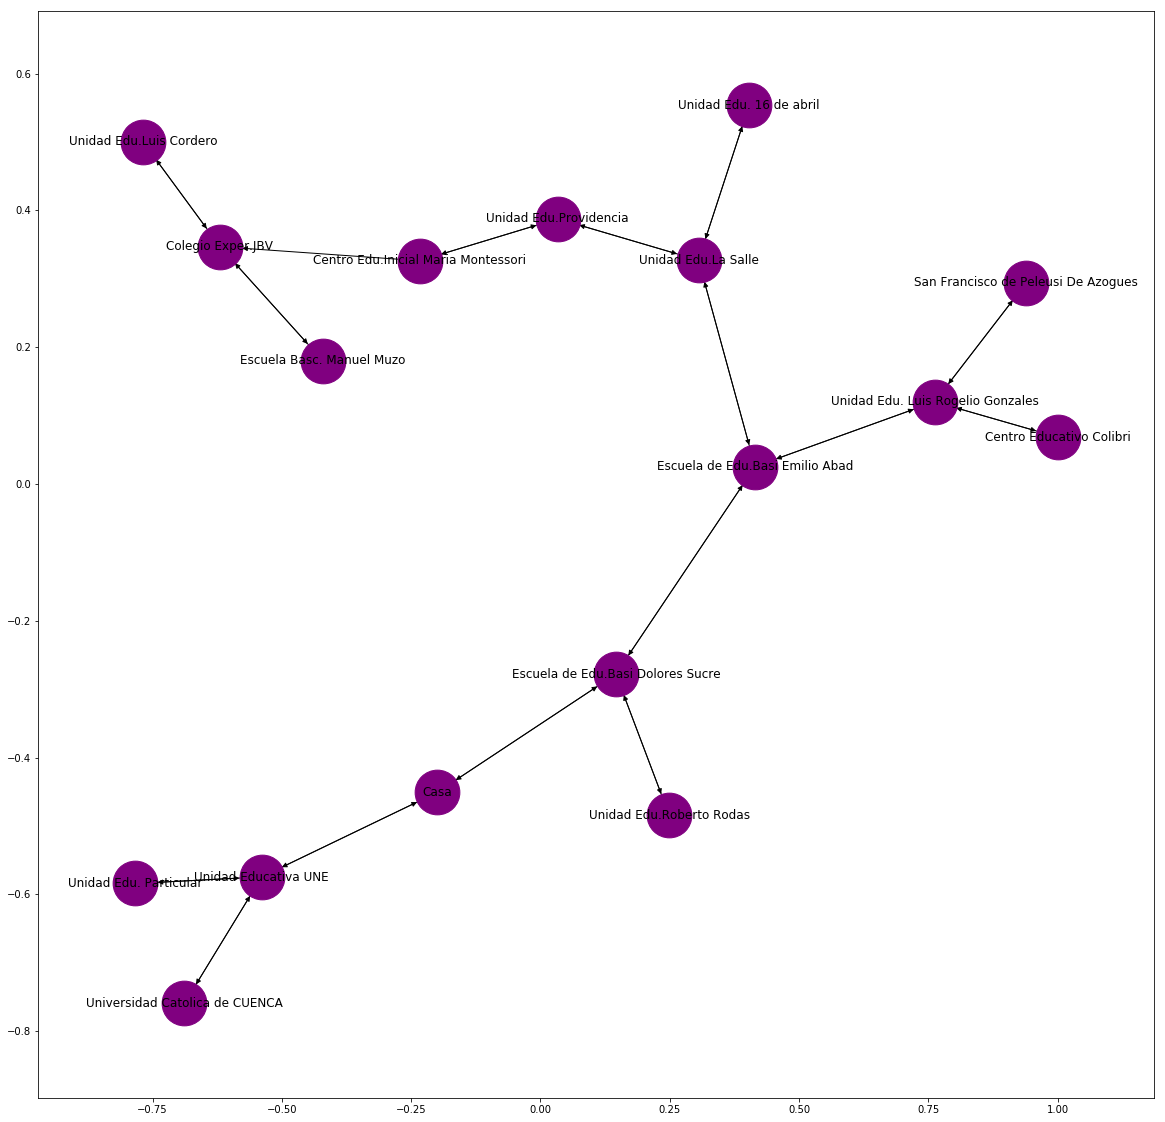

In [21]:
def grafico(dato):
    g = nx.DiGraph()
    g.add_nodes_from(dato)
    for valor, valores in dato.items():
        for a in valores:
            g.add_edge(valor, a, size=150, length=str(valores[a]))

    posicion = nx.spring_layout(g)
    plt.figure(figsize=(20,20))
    labels = nx.get_edge_attributes(g, 'length')
    nx.draw_networkx(g, posicion, node_color='purple', with_labels=True, node_size=2000)
   
    plt.show()
grafico(connections)


In [9]:

val=[0,0,0,0]
fila=0
def Reinas(val,fila,n):
    if fila>=n:
        return False

    enc = False

    while True:
            if (val[fila] < n):
                val[fila] = val[fila] + 1
            
                
                if fila != n-1:
                    enc = Reinas(val, fila+1,n)
                    if enc==False:
                        val[fila+1] = 0
                else:
                    print(val)
                    enc = True
            if (val[fila]==n or enc==True):
                break
    return enc

def Validar(val,fila):
    for i in range(fila):
        if (val[i]==val[fila]) or (abs(fila)== abs(val[fila]-val[i])):
            return False

print(Reinas(val,fila,4))


[1, 1, 1, 1]
True


# Conclusiones

Este metedod es utilizado para recorrer todo los nodos del arbol y ir expandiendo cada nodo que va localizando 
